##  Import the necessary packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score
import datetime as dt
import seaborn as sns
from scipy import stats

## Load the dataset


In [2]:
data=pd.read_excel("AI for Hiring Data Set.xlsx")

In [3]:
data.head()

,S.NO,DEPT,COLLEGE,GENDER,10TH,12TH,UG,PG
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,64,66,67.0,NaN
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,80.8,51,67.0,NaN
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,92,66,71.0,NaN
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67,53,60.0,NaN
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,86,72,6.5,NaN


## Check for EDA

In [4]:
data=data.iloc[:]

In [5]:
data.head()

,S.NO,DEPT,COLLEGE,GENDER,10TH,12TH,UG,PG
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,64,66,67.0,NaN
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,80.8,51,67.0,NaN
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,92,66,71.0,NaN
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67,53,60.0,NaN
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,86,72,6.5,NaN


In [6]:
data.shape

(667, 8)

In [7]:
list(data)

['S.NO', 'DEPT', 'COLLEGE', 'GENDER', '10TH', '12TH', 'UG', 'PG']

In [8]:
data.head()

,S.NO,DEPT,COLLEGE,GENDER,10TH,12TH,UG,PG
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,64,66,67.0,NaN
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,80.8,51,67.0,NaN
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,92,66,71.0,NaN
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67,53,60.0,NaN
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,86,72,6.5,NaN


## Create a new dataframe data1 and include the previous dataframe data in it

In [9]:
data1=pd.DataFrame(data,columns=['S.NO', 'DEPT', 'COLLEGE', 'GENDER', '10TH', '12TH', 'UG', 'PG'])

In [10]:
data1.head()

,S.NO,DEPT,COLLEGE,GENDER,10TH,12TH,UG,PG
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,64,66,67.0,NaN
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,80.8,51,67.0,NaN
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,92,66,71.0,NaN
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67,53,60.0,NaN
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,86,72,6.5,NaN


In [11]:
print(data1)

     S.NO      DEPT                         COLLEGE  GENDER  10TH  12TH  \
0       1  B. Sc IT  NEHRU ARTS AND SCIENCE COLLEGE  Female    64    66   
1       2  B. Sc IT  NEHRU ARTS AND SCIENCE COLLEGE    Male  80.8    51   
2       3  B. Sc IT  NEHRU ARTS AND SCIENCE COLLEGE  Female    92    66   
3       4  B. Sc IT  NEHRU ARTS AND SCIENCE COLLEGE    Male    67    53   
4       5  B. Sc IT  NEHRU ARTS AND SCIENCE COLLEGE    Male    86    72   
..    ...       ...                             ...     ...   ...   ...   
662   663       EEE                            NIET  FEMALE    78    72   
663   664       CSE                             NIT  Female    98    83   
664   665       CSE                             NIT  Female    86    68   
665   666       CSE                             NIT  Female  0.88  0.85   
666   667      CSE                              NIT  Female  0.91  0.88   

        UG  PG  
0    67.00 NaN  
1    67.00 NaN  
2    71.00 NaN  
3    60.00 NaN  
4     6.50 NaN

## Check for the EDA steps

In [12]:
data1.describe()

,S.NO,UG,PG
count,667.000000,664.000000,54.000000
mean,334.000000,57.429444,72.465617
std,192.690598,24.673544,7.537537
min,1.000000,0.519000,58.500000
25%,167.500000,55.000000,67.020833
50%,334.000000,65.000000,73.375000
75%,500.500000,72.152500,78.000000
max,667.000000,89.000000,86.000000


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.NO     667 non-null    int64  
 1   DEPT     667 non-null    object 
 2   COLLEGE  667 non-null    object 
 3   GENDER   667 non-null    object 
 4   10TH     666 non-null    object 
 5   12TH     663 non-null    object 
 6   UG       664 non-null    float64
 7   PG       54 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 41.8+ KB


## Check for the null values inside the data

In [14]:
data1.isna().sum().to_frame()

,0
S.NO,0
DEPT,0
COLLEGE,0
GENDER,0
10TH,1
12TH,4
UG,3
PG,613


## Using forward fill method to fill the null values

In [15]:
data1.fillna(method='ffill',inplace=True)

In [16]:
data1.isna().sum().to_frame().T

,S.NO,DEPT,COLLEGE,GENDER,10TH,12TH,UG,PG
0,0,0,0,0,0,0,0,436


## Using backward fill method to fill the null values

In [17]:
data1.fillna(method='bfill',inplace=True)

In [18]:
data1.isna().sum().to_frame().T

,S.NO,DEPT,COLLEGE,GENDER,10TH,12TH,UG,PG
0,0,0,0,0,0,0,0,0


In [19]:
data1.head()

,S.NO,DEPT,COLLEGE,GENDER,10TH,12TH,UG,PG
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,64,66,67.0,65.25
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,80.8,51,67.0,65.25
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,92,66,71.0,65.25
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67,53,60.0,65.25
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,86,72,6.5,65.25


In [20]:
Counter(data1.UG).most_common()

[(70.0, 25),
 (69.0, 22),
 (62.0, 22),
 (68.0, 20),
 (63.0, 18),
 (72.0, 17),
 (75.0, 16),
 (65.0, 15),
 (54.0, 14),
 (80.0, 14),
 (78.0, 14),
 (71.0, 12),
 (60.0, 12),
 (64.0, 12),
 (58.0, 12),
 (67.0, 10),
 (61.0, 10),
 (51.0, 10),
 (74.0, 10),
 (79.0, 10),
 (66.0, 9),
 (84.0, 9),
 (52.0, 9),
 (77.0, 9),
 (59.0, 8),
 (57.0, 8),
 (83.0, 7),
 (56.0, 7),
 (82.0, 5),
 (76.0, 5),
 (81.0, 5),
 (50.0, 5),
 (48.0, 4),
 (53.0, 4),
 (55.0, 4),
 (7.3, 4),
 (6.8, 3),
 (73.0, 2),
 (69.8, 2),
 (69.3, 2),
 (66.5, 2),
 (68.96296296296296, 2),
 (0.57, 2),
 (0.64, 2),
 (0.712, 2),
 (0.7, 2),
 (0.68, 2),
 (63.25, 2),
 (76.47058823529412, 2),
 (78.58823529411765, 2),
 (49.0, 2),
 (60.5, 2),
 (7.5, 2),
 (6.98, 2),
 (6.5, 1),
 (61.4, 1),
 (68.3, 1),
 (74.71, 1),
 (85.0, 1),
 (87.0, 1),
 (60.9, 1),
 (70.5, 1),
 (62.6, 1),
 (58.3, 1),
 (73.7, 1),
 (74.6, 1),
 (71.8, 1),
 (71.9, 1),
 (83.5, 1),
 (75.8, 1),
 (72.9, 1),
 (79.6, 1),
 (63.7, 1),
 (61.6, 1),
 (61.1, 1),
 (72.3, 1),
 (77.55555555555556, 1),
 (82.4

### First let's check for non float values in 10TH and 12TH

In [21]:
data1.loc[data1['10TH'] == "NRI",'10TH']=60
data1.loc[data1['10TH'] == "NRI                                         68", '10TH'] = 68
data1.loc[data1['10TH'] == "NRI                                         62", '10TH'] = 62
data1.loc[data1['10TH'] == "A",'10TH']=60

In [22]:
data1.loc[data1['12TH'] == "NRI",'12TH']=60              # replacing this with some average passing marks
data1.loc[data1['12TH'] == "nan",'12TH']=60              # replacing this with some average passing marks
data1.loc[data1['12TH'] == "88 (Polytechnic)",'12TH']=88
data1.loc[data1['12TH'] == "   57 (Polytechnic)",'12TH']=57
data1.loc[data1['12TH'] == "A",'12TH']=60               # replacing this with some average passing marks

### Let's first work on decimals and percentage values :
* UG , PG , 10TH and 12TH

1. Column has values starting decimals like .746,.685 
2. Column has values like 6.77 , 8.80 

* Approach used here : multiply and clean the data by 10 or 100 

In [23]:
def correct_startdecimal(x): 
    if (np.floor(x) < 1.0):
        x = (x*100)
    return x

In [24]:
data1['12TH'].unique()

array([66, 51, 53, 72, 70, 56, 63, 75, 58, 72.3, 65, 71, 60.4, 60, 55, 73,
       69, 76, 62, 68, 57, 61.9, 68.8, 59, 54, 79, 77, 81, 67, 88, 80, 78,
       85, 86, 82, 93, 64, 84, 74, 71.2, 72.4, 61, 77.4, 83.6, 72.9, 66.4,
       63.5, 88.67, 61.1, 71.4, 62.58, 56.8, 73.7, 84.4, 89, 83, 48, 0.7,
       0.82, 0.84, 0.75, 0.74, 0.93, 0.71, 0.872, 0.81, 0.8, 0.695, 0.794,
       0.69, 0.76, 0.89, 0.6, 73.5, 0.83, 0.865, 0.79, 0.73, 0.65, 0.64,
       0.87, 0.78, 0.77, 0.72, 0.88, 0.86, 0.85, 0.55, 79.92, 60.8, 72.6,
       68.4, 90, 79.58, 64.5, 69.5, 65.6, 77.83, 89.83, 63.58, 83.58,
       79.25, 65.5, 87, 92, 96, 91, 92.7, 94, 50, 40, 95, 44, 52, 83.5,
       81.69, 81.6, 75.5, 92.5, 85.1, 86.3, 84.5, 88.4, 74.8, 89.3, 64.8,
       77.9], dtype=object)

In [25]:
data1['UG1']= data1['UG'].apply(lambda x : correct_startdecimal(x))
data1['PG1']= data1['PG'].apply(lambda x : correct_startdecimal(x))
data1['10TH1']= data1['10TH'].apply(lambda x : correct_startdecimal(x))
data1['12TH1']= data1['12TH'].apply(lambda x : correct_startdecimal(x))

In [26]:
def correct_middecimal(x):
    if (( x >=1.0 ) & (x <= 9.0 )) :
        x=(x*10)
    return x

data1['cleanedUG'] = data1['UG1'].apply(lambda x : correct_middecimal(x))
data1['cleanedPG'] = data1['PG1'].apply(lambda x : correct_middecimal(x))
data1['cleaned10TH'] = data1['10TH1'].apply(lambda x : correct_middecimal(x))
data1['cleaned12TH'] = data1['12TH1'].apply(lambda x : correct_middecimal(x))
data1

,S.NO,DEPT,COLLEGE,GENDER,10TH,12TH,UG,PG,UG1,PG1,10TH1,12TH1,cleanedUG,cleanedPG,cleaned10TH,cleaned12TH
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,64,66,67.00,65.25,67.00,65.25,64.0,66.0,67.0,65.25,64.0,66.0
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,80.8,51,67.00,65.25,67.00,65.25,80.8,51.0,67.0,65.25,80.8,51.0
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,92,66,71.00,65.25,71.00,65.25,92.0,66.0,71.0,65.25,92.0,66.0
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67,53,60.00,65.25,60.00,65.25,67.0,53.0,60.0,65.25,67.0,53.0
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,86,72,6.50,65.25,6.50,65.25,86.0,72.0,65.0,65.25,86.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,663,EEE,NIET,FEMALE,78,72,7.13,70.00,7.13,70.00,78.0,72.0,71.3,70.00,78.0,72.0
663,664,CSE,NIT,Female,98,83,8.20,70.00,8.20,70.00,98.0,83.0,82.0,70.00,98.0,83.0
664,665,CSE,NIT,Female,86,68,7.50,70.00,7.50,70.00,86.0,68.0,75.0,70.00,86.0,68.0
665,666,CSE,NIT,Female,0.88,0.85,8.10,70.00,8.10,70.00,88.0,85.0,81.0,70.00,88.0,85.0


## Approach used for removing percentage
1. change the column type to string
2. replace % with ''
3. change the column type back to float
4. drop unused columns like UG and UG1

In [27]:
data1['cleanedUG'] = data1['cleanedUG'].astype(str)
data1['cleanedPG'] = data1['cleanedPG'].astype(str)
data1['cleaned10TH'] = data1['cleaned10TH'].astype(str)
data1['cleaned12TH'] = data1['cleaned12TH'].astype(str)

In [28]:
def rem_percent(x):
    if str(x):
        x.replace('%','')
    return x

data1['cleanedUG'] = data1['cleanedUG'].apply(lambda x : rem_percent(x))
data1['cleanedPG'] = data1['cleanedPG'].apply(lambda x : rem_percent(x))
data1['cleaned10TH'] = data1['cleaned10TH'].apply(lambda x : rem_percent(x))
data1['cleaned12TH'] = data1['cleaned12TH'].apply(lambda x : rem_percent(x))

In [29]:
data1['cleanedUG'] = data1['cleanedUG'].astype(float)
data1['cleanedPG'] = data1['cleanedPG'].astype(float)
data1['cleaned10TH'] = data1['cleaned10TH'].astype(float)
data1['cleaned12TH'] = data1['cleaned12TH'].astype(float)

## Making Gender format Equal

In [30]:
Counter(data1.GENDER)

Counter({'Female': 68,
         'Male': 64,
         'M': 166,
         'F': 272,
         'MALE': 48,
         'FEMALE': 49})

In [31]:
data1['GENDER'] = data1['GENDER'].astype(str)

In [32]:
data1["GENDER"]= data1["GENDER"].replace("FEMALE", "Female") 
data1["GENDER"]= data1["GENDER"].replace("F", "Female") 
data1["GENDER"]= data1["GENDER"].replace("MALE", "Male") 
data1["GENDER"]= data1["GENDER"].replace("M", "Male") 

In [33]:
data1['GENDER'].unique()

array(['Female', 'Male'], dtype=object)

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.NO         667 non-null    int64  
 1   DEPT         667 non-null    object 
 2   COLLEGE      667 non-null    object 
 3   GENDER       667 non-null    object 
 4   10TH         667 non-null    object 
 5   12TH         667 non-null    object 
 6   UG           667 non-null    float64
 7   PG           667 non-null    float64
 8   UG1          667 non-null    float64
 9   PG1          667 non-null    float64
 10  10TH1        667 non-null    float64
 11  12TH1        667 non-null    float64
 12  cleanedUG    667 non-null    float64
 13  cleanedPG    667 non-null    float64
 14  cleaned10TH  667 non-null    float64
 15  cleaned12TH  667 non-null    float64
dtypes: float64(10), int64(1), object(5)
memory usage: 83.5+ KB


In [35]:
data1 = data1.drop(["UG","UG1"],axis=1)
data1 = data1.drop(["PG","PG1"],axis=1)
data1 = data1.drop(["10TH","10TH1"],axis=1)
data1 = data1.drop(["12TH","12TH1"],axis=1)


In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.NO         667 non-null    int64  
 1   DEPT         667 non-null    object 
 2   COLLEGE      667 non-null    object 
 3   GENDER       667 non-null    object 
 4   cleanedUG    667 non-null    float64
 5   cleanedPG    667 non-null    float64
 6   cleaned10TH  667 non-null    float64
 7   cleaned12TH  667 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 41.8+ KB


In [37]:
data1.rename(columns={'cleanedUG':'UG'},inplace=True)
data1.rename(columns={'cleanedPG':'PG'},inplace=True)
data1.rename(columns={'cleaned10TH':'10TH'},inplace=True)
data1.rename(columns={'cleaned12TH':'12TH'},inplace=True)


## Checking for outliers


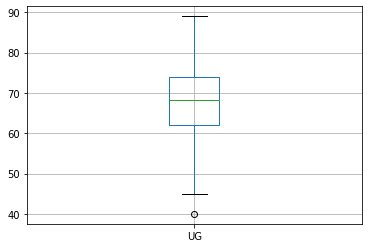

In [38]:
data1[['UG']].boxplot();

In [39]:
X=data1.UG

In [40]:
UG_outliers_removal=X.between(X.quantile(0.5),X.quantile(0.95))

In [41]:
print(str(X[UG_outliers_removal].size)+"/"+ str(X.size)+ " data points remain")

305/667 data points remain


Text(0.5, 0, 'UG')

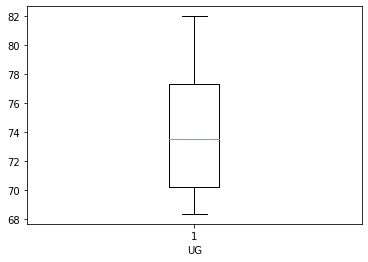

In [42]:
plt.boxplot(X[UG_outliers_removal]);
plt.xlabel("UG")

Text(0.5, 0, 'UG')

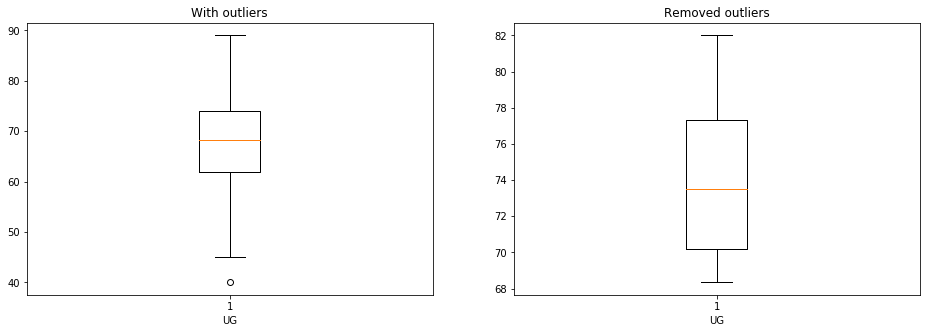

In [43]:
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[UG_outliers_removal]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("UG")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("UG")

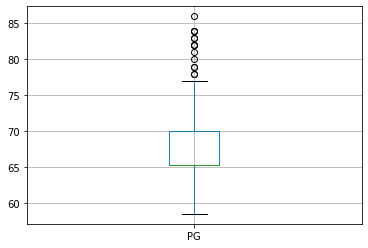

In [44]:
data1[['PG']].boxplot();

In [45]:
X=data1.PG

In [46]:
PG_outliers_removal=X.between(X.quantile(0.05),X.quantile(0.90))

In [47]:
print(str(X[PG_outliers_removal].size)+"/"+ str(X.size)+ " data points remain")

627/667 data points remain


Text(0.5, 0, 'PG')

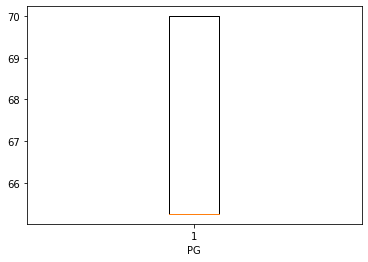

In [48]:
plt.boxplot(X[PG_outliers_removal]);
plt.xlabel("PG")

Text(0.5, 0, 'PG')

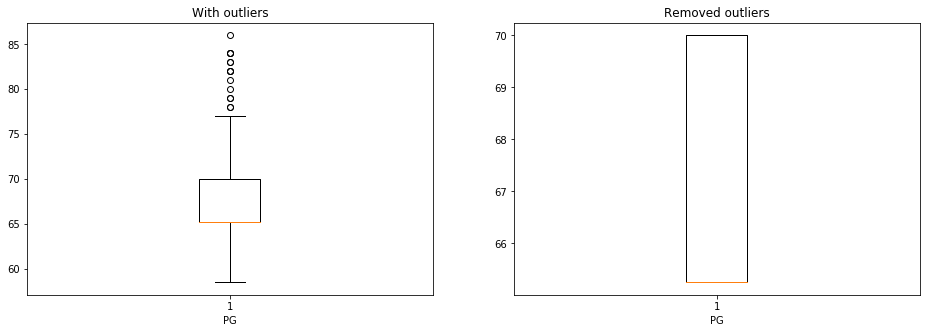

In [49]:
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[PG_outliers_removal]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("PG")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("PG")

In [50]:
data1.head()

,S.NO,DEPT,COLLEGE,GENDER,UG,PG,10TH,12TH
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,67.0,65.25,64.0,66.0
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67.0,65.25,80.8,51.0
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,71.0,65.25,92.0,66.0
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,60.0,65.25,67.0,53.0
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,65.0,65.25,86.0,72.0


In [51]:
data1.isna().sum().to_frame().T

,S.NO,DEPT,COLLEGE,GENDER,UG,PG,10TH,12TH
0,0,0,0,0,0,0,0,0


In [52]:
data1.fillna(method='ffill',inplace=True)

In [53]:
data1.isna().sum().to_frame()

,0
S.NO,0
DEPT,0
COLLEGE,0
GENDER,0
UG,0
PG,0
10TH,0
12TH,0


In [54]:
data1.shape

(667, 8)

In [55]:
data1.head()

,S.NO,DEPT,COLLEGE,GENDER,UG,PG,10TH,12TH
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,67.0,65.25,64.0,66.0
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67.0,65.25,80.8,51.0
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,71.0,65.25,92.0,66.0
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,60.0,65.25,67.0,53.0
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,65.0,65.25,86.0,72.0


In [56]:
data1.isnull().sum().to_frame().T

,S.NO,DEPT,COLLEGE,GENDER,UG,PG,10TH,12TH
0,0,0,0,0,0,0,0,0


In [57]:
data1.fillna(method='ffill',inplace=True)

In [58]:
data1.isnull().sum().to_frame().T

,S.NO,DEPT,COLLEGE,GENDER,UG,PG,10TH,12TH
0,0,0,0,0,0,0,0,0


## The data on below index is concatenated marks of students and hence dropping it

In [59]:
# cross check again the index if these are the correct indexes
data1.drop(data1.index[498],inplace=True)

In [60]:
data1.drop(data1.index[506],inplace=True)

In [61]:
data1.drop(data1.index[598],inplace=True)

In [62]:
data1.shape

(664, 8)

## Add a new column called eligible based on UG and PG marks

In [63]:
data1.loc[((data1.UG>=60.0) & (data1.PG>=60.0)),'Eligible']='Yes'
data1.loc[((data1.UG<60.0) |(data1.PG<60.0)),'Eligible']='No'

In [64]:
data1.head()

,S.NO,DEPT,COLLEGE,GENDER,UG,PG,10TH,12TH,Eligible
0,1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,67.0,65.25,64.0,66.0,Yes
1,2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67.0,65.25,80.8,51.0,Yes
2,3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,71.0,65.25,92.0,66.0,Yes
3,4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,60.0,65.25,67.0,53.0,Yes
4,5,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,65.0,65.25,86.0,72.0,Yes


## Finding the Insights

## Genderwise Overall SSC performance

In [65]:
data1.groupby(by=['GENDER'])['10TH'].mean()

GENDER
Female    82.467442
Male      74.322022
Name: 10TH, dtype: float64

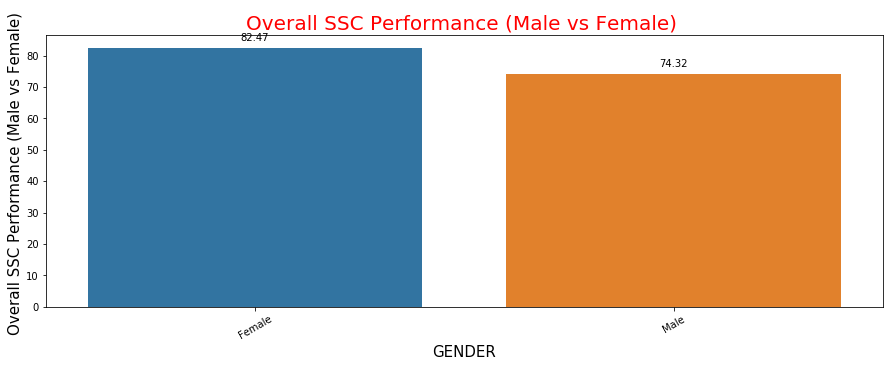

In [66]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data1['GENDER'],data1['10TH'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("GENDER",fontsize=15,color='black')
plt.ylabel("Overall SSC Performance (Male vs Female) ",fontsize=15,color='black')
plt.title("Overall SSC Performance (Male vs Female) ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Genderwise overall HSSC Performance

In [67]:
data1.groupby(by=['GENDER'])['12TH'].mean()

GENDER
Female    75.723204
Male      68.179531
Name: 12TH, dtype: float64

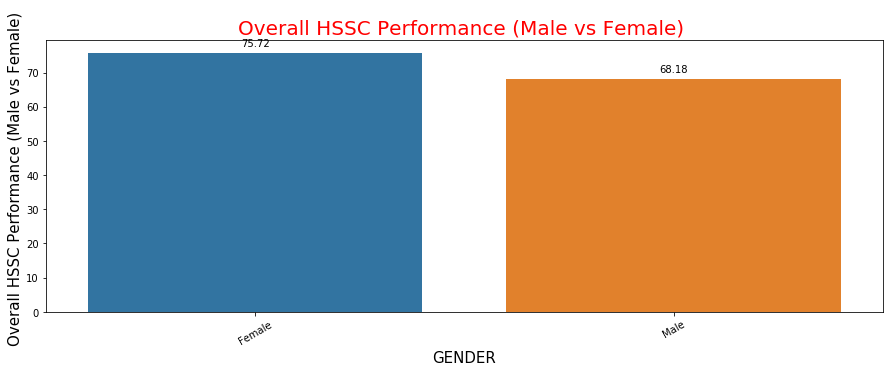

In [68]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data1['GENDER'],data1['12TH'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("GENDER",fontsize=15,color='black')
plt.ylabel("Overall HSSC Performance (Male vs Female) ",fontsize=15,color='black')
plt.title("Overall HSSC Performance (Male vs Female) ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Genderwise overall UG Performance

In [69]:
data1.groupby(by=['GENDER'])['UG'].mean()

GENDER
Female    71.564358
Male      62.385595
Name: UG, dtype: float64

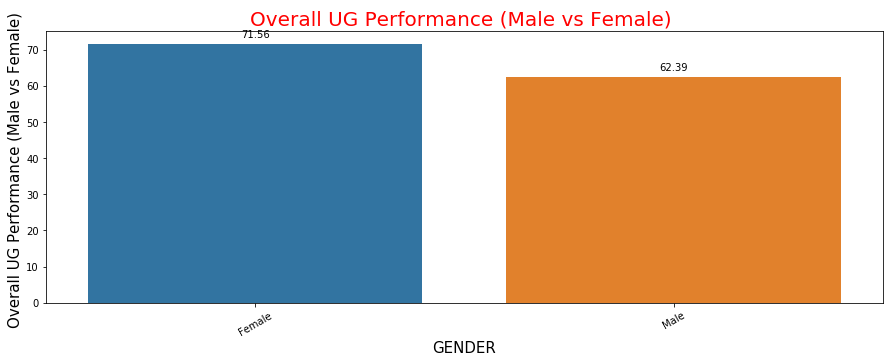

In [70]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data1['GENDER'],data1['UG'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("GENDER",fontsize=15,color='black')
plt.ylabel("Overall UG Performance (Male vs Female) ",fontsize=15,color='black')
plt.title("Overall UG Performance (Male vs Female) ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Genderwise overall PG Performance

In [71]:
data1.groupby(by=['GENDER'])['PG'].mean()

GENDER
Female    67.123721
Male      67.022611
Name: PG, dtype: float64

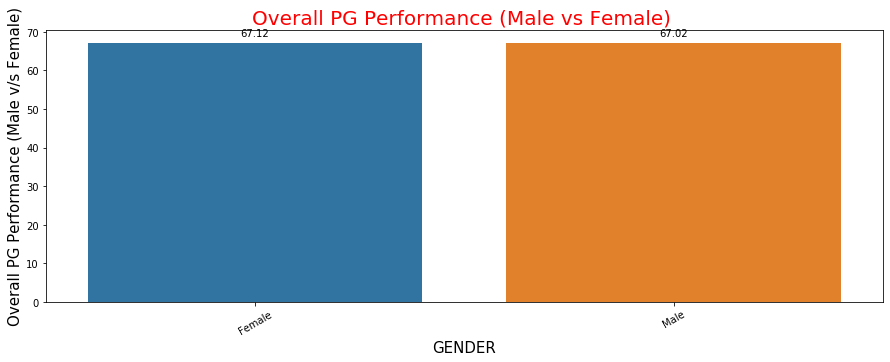

In [72]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data1['GENDER'],data1['PG'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("GENDER",fontsize=15,color='black')
plt.ylabel("Overall PG Performance (Male v/s Female)",fontsize=15,color='black')
plt.title("Overall PG Performance (Male vs Female) ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Overall UG students eligible for placements

In [73]:
data1.groupby(by=['Eligible'])['UG'].mean()

Eligible
No     54.500929
Yes    70.744181
Name: UG, dtype: float64

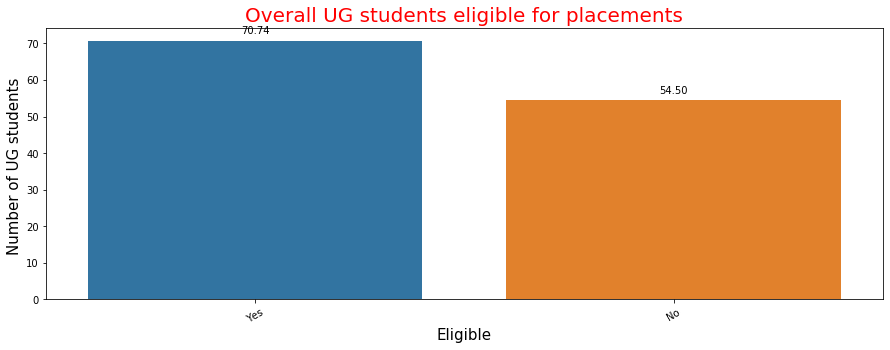

In [74]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data1['Eligible'],data1['UG'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Eligible",fontsize=15,color='black')
plt.ylabel("Number of UG students ",fontsize=15,color='black')
plt.title("Overall UG students eligible for placements",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Overall PG students eligible for placements

In [75]:
data1.groupby(by=['Eligible'])['PG'].mean()

Eligible
No     66.726965
Yes    67.162157
Name: PG, dtype: float64

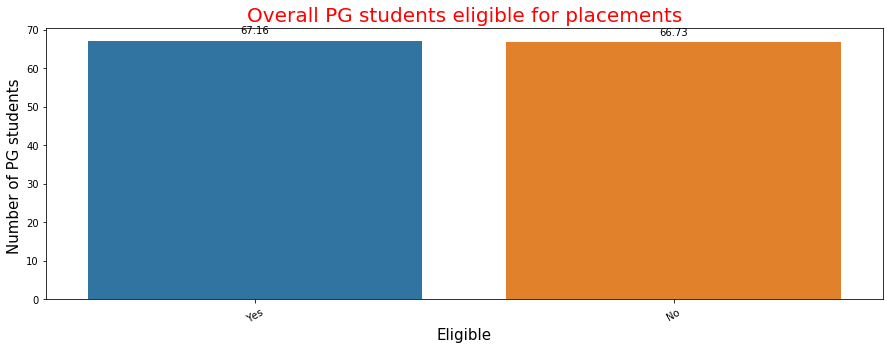

In [76]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data1['Eligible'],data1['PG'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Eligible",fontsize=15,color='black')
plt.ylabel("Number of PG students ",fontsize=15,color='black')
plt.title("Overall PG students eligible for placements",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Departmentwise UG performance

In [77]:
data1.groupby(by=['DEPT'])['UG'].mean()

DEPT
B. Sc IT                  67.616053
B.Com ( e-Comm)           63.028182
B.Com (IT)                62.824000
B.Com (PA) B              61.777778
B.Sc (CT)                 71.047619
B.Sc (Micro Nano)         67.828000
B.Sc ECS                  64.375000
B.Sc Mathematics          71.625000
BBA CA                    62.397727
BBA IB                    65.127119
BBA RM                    57.117647
BCA                       72.466667
BSc Micro Biology         70.002855
Biochemistry with Nano    77.759591
Biotechnology             63.163237
COMMERCE (PA) "A"         66.055556
CSE                       71.390909
CSE                       72.000000
ECE                       71.623529
EEE                       70.614286
M.Sc ( Biotech)           72.454545
M.Sc Microbiology         76.687500
M.Sc. ComputerScience     73.133333
M.Sc.ECS                  72.333333
Name: UG, dtype: float64

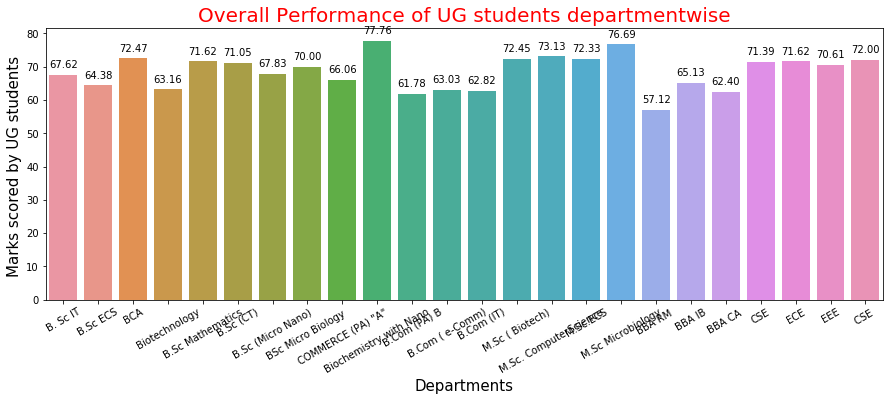

In [78]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data1['DEPT'],data1['UG'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Departments",fontsize=15,color='black')
plt.ylabel("Marks scored by UG students ",fontsize=15,color='black')
plt.title("Overall Performance of UG students departmentwise",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Departmentwise PG performance

In [79]:
data1.groupby(by=['DEPT'])['PG'].mean()

DEPT
B. Sc IT                  65.250000
B.Com ( e-Comm)           65.250000
B.Com (IT)                65.250000
B.Com (PA) B              65.250000
B.Sc (CT)                 65.250000
B.Sc (Micro Nano)         65.250000
B.Sc ECS                  65.250000
B.Sc Mathematics          65.250000
BBA CA                    70.000000
BBA IB                    70.000000
BBA RM                    70.000000
BCA                       65.250000
BSc Micro Biology         65.250000
Biochemistry with Nano    65.250000
Biotechnology             65.250000
COMMERCE (PA) "A"         65.250000
CSE                       70.000000
CSE                       70.000000
ECE                       70.000000
EEE                       70.000000
M.Sc ( Biotech)           64.553030
M.Sc Microbiology         75.000000
M.Sc. ComputerScience     79.266667
M.Sc.ECS                  67.838333
Name: PG, dtype: float64

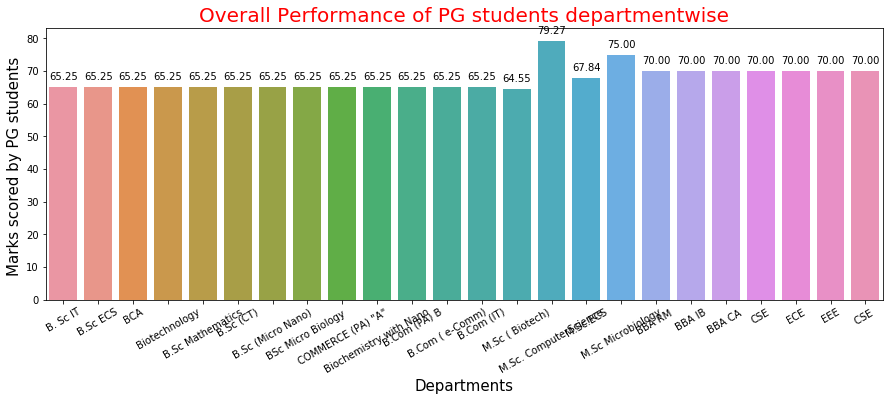

In [80]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data1['DEPT'],data1['PG'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Departments",fontsize=15,color='black')
plt.ylabel("Marks scored by PG students ",fontsize=15,color='black')
plt.title("Overall Performance of PG students departmentwise",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Departmentwise students eligible for placements

In [81]:
enc=LabelEncoder()
data1.Eligible=enc.fit_transform(data1.Eligible)

In [82]:
data1.groupby(by=['DEPT'])['Eligible'].count()

DEPT
B. Sc IT                  38
B.Com ( e-Comm)           22
B.Com (IT)                25
B.Com (PA) B              36
B.Sc (CT)                 21
B.Sc (Micro Nano)         55
B.Sc ECS                  24
B.Sc Mathematics          16
BBA CA                    44
BBA IB                    59
BBA RM                    17
BCA                       54
BSc Micro Biology         59
Biochemistry with Nano    23
Biotechnology             27
COMMERCE (PA) "A"         36
CSE                       22
CSE                        1
ECE                       17
EEE                       14
M.Sc ( Biotech)           11
M.Sc Microbiology         16
M.Sc. ComputerScience     15
M.Sc.ECS                  12
Name: Eligible, dtype: int64

In [83]:
data1.groupby(by=['DEPT'])['Eligible'].mean()

DEPT
B. Sc IT                  0.868421
B.Com ( e-Comm)           0.727273
B.Com (IT)                0.560000
B.Com (PA) B              0.583333
B.Sc (CT)                 1.000000
B.Sc (Micro Nano)         0.836364
B.Sc ECS                  0.500000
B.Sc Mathematics          1.000000
BBA CA                    0.636364
BBA IB                    0.762712
BBA RM                    0.352941
BCA                       0.981481
BSc Micro Biology         0.932203
Biochemistry with Nano    1.000000
Biotechnology             0.666667
COMMERCE (PA) "A"         0.777778
CSE                       1.000000
CSE                       1.000000
ECE                       1.000000
EEE                       1.000000
M.Sc ( Biotech)           0.909091
M.Sc Microbiology         1.000000
M.Sc. ComputerScience     1.000000
M.Sc.ECS                  0.916667
Name: Eligible, dtype: float64

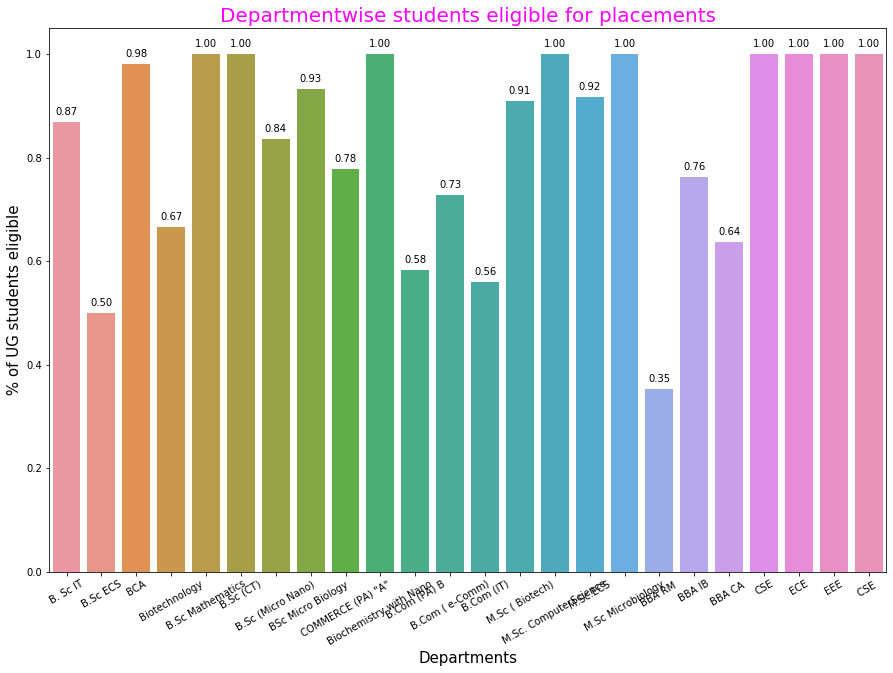

In [84]:
plt.figure(figsize=(15,10))
splot=sns.barplot(data1['DEPT'],data1['Eligible'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Departments",fontsize=15,color='black')
plt.ylabel(" % of UG students eligible ",fontsize=15,color='black')
plt.title("Departmentwise students eligible for placements",fontdict={'fontsize':20,'color':'magenta'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

## Define X (Predictor) and y(Target) variables


In [85]:
X=data1.loc[:,['DEPT','COLLEGE','GENDER','UG','PG']]
y=data1.Eligible

In [86]:
X

,DEPT,COLLEGE,GENDER,UG,PG
0,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,67.0,65.25
1,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,67.0,65.25
2,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Female,71.0,65.25
3,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,60.0,65.25
4,B. Sc IT,NEHRU ARTS AND SCIENCE COLLEGE,Male,65.0,65.25
...,...,...,...,...,...
662,EEE,NIET,Female,71.3,70.00
663,CSE,NIT,Female,82.0,70.00
664,CSE,NIT,Female,75.0,70.00
665,CSE,NIT,Female,81.0,70.00


In [87]:
y

0      1
1      1
2      1
3      1
4      1
      ..
662    1
663    1
664    1
665    1
666    1
Name: Eligible, Length: 664, dtype: int32

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 666
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPT     664 non-null    object 
 1   COLLEGE  664 non-null    object 
 2   GENDER   664 non-null    object 
 3   UG       664 non-null    float64
 4   PG       664 non-null    float64
dtypes: float64(2), object(3)
memory usage: 51.1+ KB


## Using Label Encoder

In [89]:
enc=LabelEncoder()
X.DEPT=enc.fit_transform(X.DEPT)
X.COLLEGE=enc.fit_transform(X.COLLEGE)
X.GENDER=enc.fit_transform(X.GENDER)


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 666
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPT     664 non-null    int32  
 1   COLLEGE  664 non-null    int32  
 2   GENDER   664 non-null    int32  
 3   UG       664 non-null    float64
 4   PG       664 non-null    float64
dtypes: float64(2), int32(3)
memory usage: 43.3 KB


In [91]:
X.head()

,DEPT,COLLEGE,GENDER,UG,PG
0,0,0,0,67.0,65.25
1,0,0,1,67.0,65.25
2,0,0,0,71.0,65.25
3,0,0,1,60.0,65.25
4,0,0,1,65.0,65.25


## Correlation Matrix

In [92]:
corr=data1.corr()
corr

,S.NO,UG,PG,10TH,12TH,Eligible
S.NO,1.000000,-0.078412,0.595481,-0.113448,0.058581,-0.049934
UG,-0.078412,1.000000,0.084109,0.460959,0.538195,0.712998
PG,0.595481,0.084109,1.000000,0.000493,0.055137,0.050235
10TH,-0.113448,0.460959,0.000493,1.000000,0.548676,0.369104
12TH,0.058581,0.538195,0.055137,0.548676,1.000000,0.394214
Eligible,-0.049934,0.712998,0.050235,0.369104,0.394214,1.000000


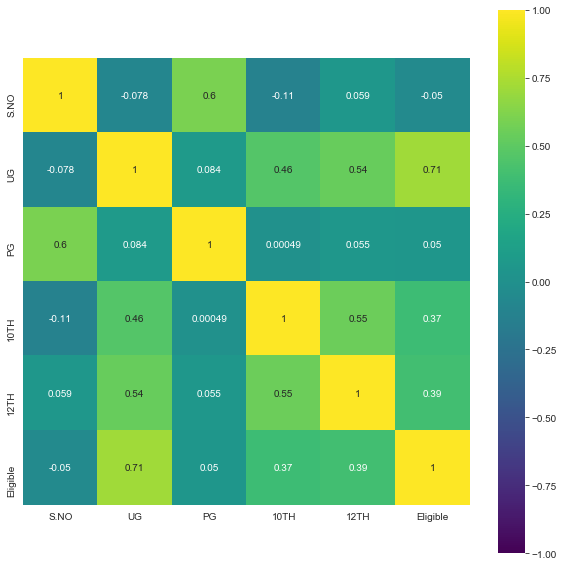

In [93]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.heatmap(corr,vmin=-1, vmax=1, center=0,fmt='.2g',annot_kws=None,linewidths=0,linecolor='white',xticklabels='auto',
    yticklabels='auto',cbar=True,cmap='viridis',square=True,annot=True)

## Using train-test split


In [94]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=10)

In [95]:
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (464, 5)
X_test shape =  (200, 5)
y_train shape =  (464,)
y_test shape =  (200,)


## Different Machine Learning Algorithms used 

## 1) Using XGBoost algorithm

In [96]:
from xgboost import XGBClassifier

## Define the Model


In [97]:
model=XGBClassifier(max_depth=5,learning_rate=0.001,random_state=50,n_estimators=40)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=50, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

## Predict the Model

In [98]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  99.78448275862068

 Accuracy of Testing =  98.0

 Precision score: 98.04848484848485

 Recall score: 98.0

 F1 score: 97.95821588459626


## Generating crosstab, confusion matrix, classification report

In [99]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Eligible,,
0,35,4
1,0,161


In [100]:
print(confusion_matrix(y_test,y_predict))

[[ 35   4]
 [  0 161]]


In [101]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        39
           1       0.98      1.00      0.99       161

    accuracy                           0.98       200
   macro avg       0.99      0.95      0.97       200
weighted avg       0.98      0.98      0.98       200



## 2) Using Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

## Define the Model

In [103]:
model=RandomForestClassifier(n_estimators=250,random_state=10,criterion='gini')
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

## Predict the Model

In [104]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  100.0

 Accuracy of Testing =  98.5

 Precision score: 98.52743902439025

 Recall score: 98.5

 F1 score: 98.47692307692307


## Generating crosstab, confusion matrix, classification report

In [105]:
print(confusion_matrix(y_test,y_predict))

[[ 36   3]
 [  0 161]]


In [106]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Eligible,,
0,36,3
1,0,161


In [107]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.98      1.00      0.99       161

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.98       200
weighted avg       0.99      0.98      0.98       200



## 3) Using Gradient Boosting Classifier

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

## Define the Model

In [109]:
model=GradientBoostingClassifier(n_estimators=250,random_state=10)
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Predict the Model

In [110]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  100.0

 Accuracy of Testing =  98.5

 Precision score: 98.49301494476933

 Recall score: 98.5

 F1 score: 98.49258172168389


## Generating crosstab, confusion matrix, classification report

In [111]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 37   2]
 [  1 160]]


col_0,0,1
Eligible,,
0,37,2
1,1,160


In [112]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.99      0.99      0.99       161

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



## 4) Using DecisionTree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

## Define the Model

In [114]:
model=DecisionTreeClassifier(splitter='best',random_state=10,criterion='gini')
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.         0.         0.         0.98550181 0.01449819]


## Predict the Model

In [115]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  100.0

 Accuracy of Testing =  98.5

 Precision score: 98.49301494476933

 Recall score: 98.5

 F1 score: 98.49258172168389


## Generating crosstab, confusion matrix, classification report

In [116]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 37   2]
 [  1 160]]


col_0,0,1
Eligible,,
0,37,2
1,1,160


In [117]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.99      0.99      0.99       161

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



## 5) Using Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

## Define the Model

In [119]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict the Model

In [120]:
y_train_predict=model.predict(X_train)
y_predict= model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  99.56896551724138

 Accuracy of Testing =  99.0

 Precision score: 99.0122699386503

 Recall score: 99.0

 F1 score: 98.98992852501624


## Generating crosstab, confusion matrix, classification report

In [121]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 37   2]
 [  0 161]]


col_0,0,1
Eligible,,
0,37,2
1,0,161


In [122]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.99      1.00      0.99       161

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200



## 6) Using Support Vector Machine (SVM)

In [123]:
from sklearn.svm import SVC

## Define the Model

In [124]:
model=SVC(C=130,kernel = 'rbf',random_state=10)
model.fit(X_train,y_train)

SVC(C=130, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

## Predict the Model

In [125]:
y_train_predict=model.predict(X_train)
y_predict= model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  99.78448275862068

 Accuracy of Testing =  98.0

 Precision score: 98.04848484848485

 Recall score: 98.0

 F1 score: 97.95821588459626


## Generating crosstab, confusion matrix, classification report

In [126]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 35   4]
 [  0 161]]


col_0,0,1
Eligible,,
0,35,4
1,0,161


In [127]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        39
           1       0.98      1.00      0.99       161

    accuracy                           0.98       200
   macro avg       0.99      0.95      0.97       200
weighted avg       0.98      0.98      0.98       200



## 7) Using K-Nearest Neighbor(KNN) Algorithm

In [128]:
from sklearn.neighbors import KNeighborsClassifier

## Define the Model

In [129]:
model= KNeighborsClassifier(n_neighbors=20, metric='euclidean')
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

## Predict the Model

In [130]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  98.0603448275862

 Accuracy of Testing =  96.0

 Precision score: 96.18934911242603

 Recall score: 96.0

 F1 score: 95.81991341991342


## Generating crosstab, confusion matrix, classification report

In [131]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 31   8]
 [  0 161]]


col_0,0,1
Eligible,,
0,31,8
1,0,161


In [132]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.79      0.89        39
           1       0.95      1.00      0.98       161

    accuracy                           0.96       200
   macro avg       0.98      0.90      0.93       200
weighted avg       0.96      0.96      0.96       200



## 8) Artificial Neural Networks (ANN)

In [133]:
from sklearn.neural_network import MLPClassifier

## Define the Model

In [134]:
model=MLPClassifier(hidden_layer_sizes=10,batch_size=10,learning_rate_init=0.01,random_state=5)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=5, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Predict the Model

In [135]:
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score: {}".format(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score: {}".format(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score: {}".format(f1_score(y_test,y_predict,average='weighted')*100))


 Accuracy of Training =  96.98275862068965

 Accuracy of Testing =  94.5

 Precision score: 94.46875

 Recall score: 94.5

 F1 score: 94.2873838777345


## Generating crosstab, confusion matrix, classification report

In [136]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 30   9]
 [  2 159]]


col_0,0,1
Eligible,,
0,30,9
1,2,159


In [137]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        39
           1       0.95      0.99      0.97       161

    accuracy                           0.94       200
   macro avg       0.94      0.88      0.91       200
weighted avg       0.94      0.94      0.94       200



## 9) Extra Trees Classifier

## Import the necessary package

In [138]:
from sklearn.ensemble import ExtraTreesClassifier 

## Define the Model

In [139]:
model=ExtraTreesClassifier(n_estimators=100,criterion='gini',random_state=5,max_depth=3,bootstrap=True)
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.07864804 0.02802515 0.35456755 0.5115472  0.02721206]


## Predict the Model

In [140]:
y_train_predict=model.predict(X_train)
y_predict= model.predict(X_test)

print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy score of Training =  92.88793103448276
Accuracy score of Testing =  91.5
Precision score =  92.31179775280899
Recall score =  91.5
F1 score =  90.52870061414963


## Generating confusion matrix, crosstab and classification report

In [141]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 22  17]
 [  0 161]]


col_0,0,1
Eligible,,
0,22,17
1,0,161


In [142]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        39
           1       0.90      1.00      0.95       161

    accuracy                           0.92       200
   macro avg       0.95      0.78      0.84       200
weighted avg       0.92      0.92      0.91       200

